In [1]:
%matplotlib inline
import mglearn
import matplotlib.pyplot as plt
import numpy as np

## Машинное обучение с учителем

Есть два основные задачи машинного обучения с учителем:
классификация (classification) и регрессия (regression).
Цель классификации состоит в том, чтобы спрогнозировать метку
класса (class label), которая представляет собой выбор из заранее
определенного списка возможных вариантов. Ранее мы использовали
пример классификации ирисов, когда относили цветок к одному из трех
возможных сортов. Классификация иногда разделяется на бинарную
классификацию (binary classification), которая является частным случаем
разделения на два класса, и мультиклассовую классификацию (multiclass
classification), когда в классификации участвует более двух классов.
Бинарную классификацию можно представить как попытку ответить на
поставленный вопрос в формате «да/нет». Классификация электронных
писем на спам и не-спам является примером бинарной классификации.
В данной задаче бинарной классификации ответ «да/нет» дается на
вопрос «является ли это электронное письмо спамом?»

- Например:
В бинарной классификации мы часто говорим о том, что один
класс является положительным (positive) классом, а другой класс
является отрицательным (negative) классом. При этом
«положительный» означает здесь не наличие выгоды (ценности),
а объект исследования. Таким образом, при поиске спама,
положительным классом может быть класс «спам». Вопрос о том,
какой из этих двух классов будет положительным, часто
субъективен и зависит от предметной области исследования.

С другой стороны, пример классификации ирисов является примером
мультиклассовой классификации. Еще один пример – прогнозирование
языка веб-сайта. Классами здесь будет заранее определенный список
возможных языков.
Цель регрессии состоит в том, чтобы спрогнозировать непрерывное
число или число с плавающей точкой (floating-point number), если
использовать термины программирования, или вещественное число (real
number), если говорить языком математических терминов.
Прогнозирование годового дохода человека в зависимости от его
образования, возраста и места жительства является примером
регрессионной задачи. Прогнозируемое значение дохода представляет
собой сумму (amount) и может быть любым числом в заданном
диапазоне. Другой пример регрессионной задачи – прогнозирование
объема урожая зерна на ферме в зависимости от таких атрибутов, как
объем предыдущего урожая, погода, и количество сотрудников,
работающих на ферме. И снова объем урожая может быть любым числом.
Самый простой способ отличить классификацию от регрессии –
спросить, заложена ли в полученном ответе определенная непрерывность
(преемственность). Если полученные результаты непрерывно связаны
друг с другом, то решаемая задача является задачей регрессии. Возьмем
прогнозирование годового дохода. Здесь ясно видна непрерывность
ответа. Разница между годовым доходом в 40000$  или  40001$ не
существенна, хотя речь идет о разных денежных суммах. Если наш
алгоритм предсказывает 39999$ или  40001$, в то время как он должен
предсказать  40000$ (реальное значение годового дохода), мы не будем
настаивать на том, что разница существенна. Наоборот, в задаче
распознавании языка веб-сайта (задаче классификации) ответы четко
определены. Контент сайта может быть написан либо на одном
конкретном языке, либо на другом. Между языками нет непрерывной
связи, не существует языка, находящегося между английским и
французским

### Обобщающая способность переобучение и недообучение

   В машинном обучении с учителем нам нужно построить модель на
обучающих данных, а затем получить точные прогнозы для новых, еще
не встречавшихся нам данных, которые имеют те же самые
характеристики, что и использованный нами обучающий набор. Если
модель может выдавать точные прогнозы на ранее не встречавшихся
данных, мы говорим, что модель обладает способностью обобщать
(generalize) результат на тестовые данные. Нам необходимо построить
модель, которая будет обладать максимальной обобщающей
способностью.
    Обычно мы строим модель таким образом, чтобы она давала точные
прогнозы на обучающем наборе. Если обучающий и тестовый наборы
имеют много общего между собой, можно ожидать, что модель будет
точной и на тестовом наборе. Однако в некоторых случаях этого не
происходит. Например, если мы строим очень сложные модели,
необходимо помнить, что на обучающей выборке можно получить
произвольную правильность.
Давайте взглянем на выдуманный пример, чтобы проиллюстрировать
этот тезис. Скажем, начинающий специалист по анализу данных хочет
спрогнозировать покупку клиентом лодки на основе записей о клиентах,
которые ранее приобрели лодку, и клиентах, которые не заинтересованы
в покупке лодки. Цель состоит в том, чтобы отправить рекламные
письма клиентам, которые, вероятно, хотят совершить покупку, и не
беспокоить клиентов, не заинтересованных в покупке.
    Единственный показатель качества работы алгоритма на новых
данных – это использование тестового набора. Однако интуитивно8 мы
ожидаем, что простые модели должны лучше обобщать результат на
новые данные. Если бы правило звучало «люди старше 50 лет хотят
купить лодку» и оно объясняло бы поведение всех клиентов, мы доверяли бы ему больше, чем правилу, которое помимо возраста
включало бы количество детей и семейное положение. Поэтому нам
всегда нужно искать самую простую модель. Построение модели, которая
слишком сложна для имеющегося у нас объема информации (что и
сделал наш начинающий специалист по анализу данных), называется
переобучением (overfitting). Переобучение происходит, когда ваша
модель слишком точно подстраивается под особенности обучающего
набора и вы получаете модель, которая хорошо работает на обучающем
наборе, но не умеет обобщать результат на новые данные. С другой
стороны, если ваша модель слишком проста, скажем, вы сформулировали
правило «все, у кого есть собственный дом, покупает лодку», вы,
возможно, не смогли охватить все многообразие и изменчивость данных,
и ваша модель будет плохо работать даже на обучающем наборе. Выбор
слишком простой модели называется недообучением (underfitting).
Чем сложнее модель, тем лучше она будет работать на обучающих
данных. Однако, если наша модель становится слишком сложной, мы
начинаем уделять слишком много внимания каждой отдельной точке
данных в нашем обучающем наборе, и эта модель не будет хорошо
обобщать результат на новые данные.
Существует оптимальная точка, которая позволяет получить
наилучшую обобщающую способность. Собственно это и есть модель,
которую нам нужно найти.

### Взаимосвязь между сложностью модели и размером набора данных

Важно отметить, что сложность модели тесно связана с изменчивостью
входных данных, содержащихся в вашем обучающем наборе: чем больше
разнообразие точек данных в вашем наборе, тем более сложную модель
можно использовать, не беспокоясь о переобучении. Обычно больший
объем данных дает большее разнообразие, таким образом, большие
наборы данных позволяют строить более сложные модели. Однако
простое дублирование одних и тех же точек данных или сбор очень
похожих данных здесь не поможет. 
   
   Увеличение объема данных и построение более сложных моделей
часто творят чудеса при решении задач машинного обучения с учителем.
В этой книге мы сосредоточимся на работе с данными фиксированного
размера. В действительности вы, как правило, сами можете определить
объем собираемых данных, и это может оказаться более полезным, чем
корректировка и настройка вашей модели. Никогда не стоит
недооценивать преимущества увеличения объема данных.

Теперь мы рассмотрим наиболее популярные алгоритмы машинного
обучения и объясним, как они обучаются на основе данных и как
вычисляют прогнозы. Кроме того, мы расскажем о том, как принцип
сложности реализуется для каждой из этих моделей, и покажем, как тот
или иной алгоритм строит модель. Мы рассмотрим преимущества и
недостатки каждого алгоритма, а также расскажем о том, применительно
к каким данным лучше всего использовать тот или иной алгоритм. Мы
также объясним значение наиболее важных параметров и опций. Многие
алгоритмы имеют опции классификации и регрессии, поэтому мы
опишем обе опции.
Необязательно детально вчитываться в описание каждого алгоритма,
но понимание модели даст вам лучшее представление о различных
способах работы алгоритмов машинного обучения. Кроме того, эту главу
можно использовать в качестве справочного руководства, и вы можете
вернуться к ней, если не знаете, как работает тот или иной алгоритм.

Для иллюстрации различных алгоритмов мы будем использовать
несколько наборов данных. Некоторые наборы данных будет
небольшими и синтетическими (то есть выдуманными), призванными
подчеркнуть отдельные аспекты алгоритмов. Другие наборы данных
будут большими, реальными примерами.
Примером синтетического набора данных для двухклассовой
классификации является набор данных forge, который содержит два
признака. Программный код, приведенный ниже, создает диаграмму
рассеяния (рис.), визуализируя все точки данных в этом наборе. На
графике первый признак отложен на оси х, а второй – по оси у. Как это
всегда бывает в диаграммах рассяения, каждая точка данных
представлена в виде одного маркера. Цвет и форма маркера указывает на
класс, к которому принадлежит точка:

X.shape: (26, 2)


c:\Users\biaspaltsau_aa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


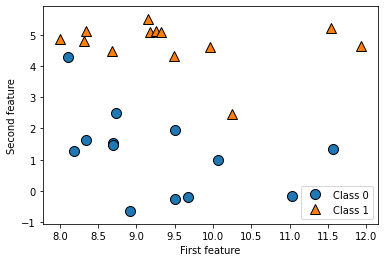

In [2]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

Как видно из сводки по массиву X, этот набор состоит из 26 точек
данных и 2 признаков. Для иллюстрации алгоритмов регрессии, мы
воспользуемся синтетическим набором wave. Набор данных имеет
единственный входной признак и непрерывную целевую переменную
или отклик (response), который мы хотим смоделировать. На рисунке,
построенном здесь (рис.), по оси x располагается единственный
признак, а по оси y – целевая переменная (ответ).

Text(0, 0.5, 'Target')

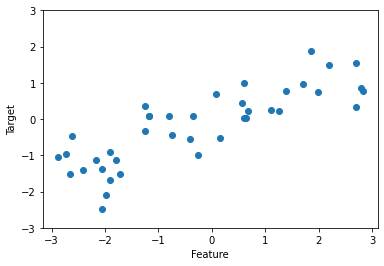

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

Мы используем эти очень простые, низкоразмерные наборы данных,
потому что их легко визуализировать – печатная страница имеет два
измерения, и данные, которые содержат более двух признаков,
графически представить трудно. Вывод, полученный для набора с
небольшим числом признаков или низкоразмерном (low-dimensional)
наборе, возможно, не подтвердится для набора данных с большим
количеством признаков или высокоразмерного (high-dimensional)
набора. Если вы помните об этом, проверка алгоритма на
низкоразмерном наборе данных может оказаться очень полезной.

Мы дополним эти небольшие синтетические наборы данных двумя
реальными наборами, которые включены в scikit-learn. Один из них –
набор данных по раку молочной железы Университета Висконсин
(cancer для краткости), в котором записаны клинические измерения
опухолей молочной железы. Каждая опухоль обозначается как «benign»
(«доброкачественная», для неагрессивных опухолей) или malignant
(«злокачественная», для раковых опухолей), и задача состоит в том,
чтобы на основании измерений ткани дать прогноз, является ли опухоль
злокачественной.
Данные можно загрузить из scikit-learn с помощью функции
load_breast_cancer:

### - Примечание:

Наборы данных, которые включены в scikit-learn, обычно
хранятся в виде объектов Bunch, которые содержат некоторую
информацию о наборе данных, а также фактические данные. Все,
что вам нужно знать об объектах Bunch – это то, что они похожи
на словари, с тем преимуществом, что вы можете прочитать
значения, используя точку (bunch.key вместо bunch['key'])

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Набор данных включает 569 точек данных и 30 признаков.

In [5]:
print("Shape of cancer data:", cancer.data.shape)

Shape of cancer data: (569, 30)


In [6]:
print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


Из 569 точек данных 212 помечены как злокачественные, а 357 как
доброкачественные.

Чтобы получить содержательное описание каждого признака,
взглянем на атрибут feature_names:

In [7]:
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Если вам интересно, то более подробную информацию о данных
можно получить, прочитав cancer.DESCR.
Кроме того, для задач регрессии мы будем использовать реальный
набор данных – набор данных Boston Housing. Задача, связанная с этим
набором данных, заключается в том, чтобы спрогнозировать медианную
стоимость домов в нескольких районах Бостона в 1970-е годы на основе
такой информации, как уровень преступности, близость к Charles River,
удаленность от радиальных магистралей и т.д. Набор данных содержит
506 точек данных и 13 признаков:

Опять же, вы можете получить более подробную информацию о
наборе данных, прочитав атрибут boston.DESCR. В данном случае мы
более детально проанализируем набор данных, учтя не только 13
измерений в качестве входных признаков, но и приняв во внимание все
взаимодействия (interactions) между признаками. Иными словами, мы
будем учитывать в качестве признаков не только уровень преступности
и удаленность от радиальных магистралей по отдельности, но и
взаимодействие уровень преступности–удаленность от радиальных
магистралей. Включение производных признаков называется
конструированием признаков (feature engineering), которое мы
рассмотрим более подробно в дальнейшем. Набор данных c производными
признаками можно загрузить с помощью функции load_extended_boston:

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


c:\Users\biaspaltsau_aa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing d

In [9]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


Мы будем использовать эти наборы данных, чтобы объяснить и
проиллюстрировать свойства различных алгоритмов машинного
обучения. Однако сейчас давайте перейдем к самим алгоритмам.

#### Метод К ближайших соседей
Алгоритм k ближайших соседей, возможно, является самым простым
алгоритмом машинного обучения. Построение модели заключается в
запоминании обучающего набора данных. Для того, чтобы сделать
прогноз для новой точки данных, алгоритм находит ближайшие к ней
точки обучающего набора, то есть находит «ближайших соседей».

##### Классификация с помощью k ближайших соседей
В простейшем варианте алгоритм k ближайших соседей рассматривает
лишь одного ближайшего соседа – точку обучающего набора, ближе всего
расположенную к точке, для которой мы хотим получить прогноз.
Прогнозом является ответ, уже известный для данной точки обучающего
набора. На следующем рис. показано решение задачи классификации для набора
данных forge:


c:\Users\biaspaltsau_aa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


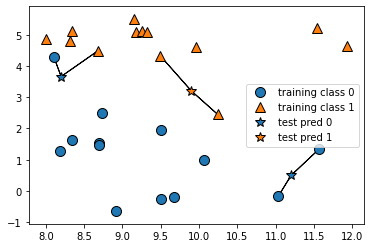

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=2)

Здесь мы добавили три новые точки данных, показанные в виде
звездочек. Для каждой мы отметили ближайшую точку обучающего
набора. Прогноз, который дает алгоритм одного ближайшего соседа –
метка этой точки (показана цветом маркера).
Вместо того, чтобы учитывать лишь одного ближайшего соседа, мы
можем рассмотреть произвольное количество (k) соседей. Отсюда и
происходит название алгоритма k ближайших соседей. Когда мы
рассматриваем более одного соседа, для присвоения метки используется
голосование (voting). Это означает, что для каждой точки тестового
набора мы подсчитываем количество соседей, относящихся к классу 0, и
количество соседей, относящихся к классу 1. Затем мы присваиваем
точке тестового набора наиболее часто встречающийся класс: другими
словами, мы выбираем класс, набравший большинство среди k
ближайших соседей. В примере, приведенном ниже (рис.),
используются три ближайших соседа:

c:\Users\biaspaltsau_aa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


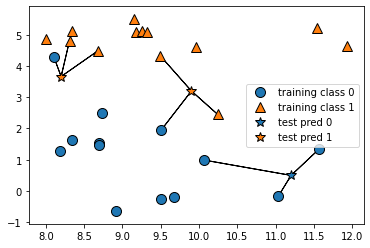

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

И снова прогнозы переданы цветом маркера. Видно, что прогноз для
новой точки данных в верхнем левом углу отличается от прогноза,
полученного при использовании одного ближайшего соседа.
Хотя данный рисунок иллюстрирует задачу бинарной классификации,
этот метод можно применить к наборам данных с любым количеством
классов. В случае мультиклассовой классификации мы подсчитываем
количество соседей, принадлежащих к каждому классу, и снова
прогнозируем наиболее часто встречающийся класс.
Теперь давайте посмотрим, как можно применить алгоритм k
ближайших соседей, используя scikit-learn. Во-первых, мы разделим
наши данные на обучающий и тестовый наборы, чтобы оценить
обобщающую способность модели:

In [13]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

c:\Users\biaspaltsau_aa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

Далее выполняем импорт и создаем объект-экземпляр класса, задавая
параметры, например, количество соседей, которое будем использовать
для классификации. В данном случае мы устанавливаем его равным 3:

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

Затем подгоняем классификатор, используя обучающий набор. Для
KNeighborsClassifier это означает запоминание набора данных, таким
образом, мы можем вычислить соседей в ходе прогнозирования:

In [15]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Чтобы получить прогнозы для тестовых данных, мы вызываем метод
predict. Для каждой точки тестового набора он вычисляет ее ближайших
соседей в обучающем наборе и находит среди них наиболее часто
встречающийся класс:

In [17]:
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


Для оценки обобщающей способности модели мы вызываем метод
score с тестовыми данными и тестовыми метками:

In [18]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


Мы видим, что наша модель имеет правильность 86%, то есть модель
правильно предсказала класс для 86% примеров тестового набора.

##### Анализ KNeighborsClassifier

Кроме того, для двумерных массивов данных мы можем показать
прогнозы для всех возможных точек тестового набора, разместив в
плоскости ху. Мы зададим цвет плоскости в соответствии с тем классом,
который будет присвоен точке в этой области. Это позволит нам
сформировать границу принятия решений (decision boundary), которая
разбивает плоскость на две области: область, где алгоритм присваивает
класс 0, и область, где алгоритм присваивает класс 1.
Программный код, приведенный ниже, визуализирует границы
принятия решений для одного, трех и девяти соседей (показаны на след. рис.):

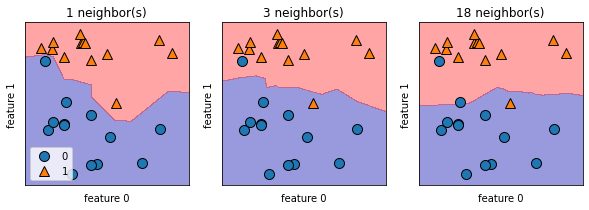

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 18], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

На рисунке слева можно увидеть, что использование модели одного
ближайшего соседа дает границу принятия решений, которая очень
хорошо согласуется с обучающими данными. Увеличение числа соседей
приводит к сглаживанию границы принятия решений. Более гладкая
граница соответствует более простой модели. Другими словами,
использование нескольких соседей соответствует высокой сложности
модели (как показано в правой части рис. ), а использование большого
количества соседей соответствует низкой сложности модели (как
показано в левой части рис.). Если взять крайний случай, когда
количество соседей будет равно количеству точек данных обучающего 
набора, каждая точка тестового набора будет иметь одних и тех же
соседей (соседями будет все точки обучающего набора) и все прогнозы
будут одинаковыми: будет выбран класс, который является наиболее
часто встречающимся в обучающем наборе.
Давайте выясним, существует ли взаимосвязь между сложностью
модели и обобщающей способностью, о которой мы говорили ранее. Мы
сделаем это с помощью реального набора данных Breast Cancer. Начнем
с того, что разобьем данные на обучающий и тестовый наборы. Затем мы
оценим качество работы модели на обучающем и тестовом наборах с
использованием разного количества соседей. Результаты показаны на
рис.:

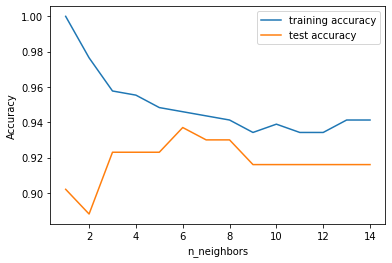

In [21]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 15)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

На этом графике по оси y отложена правильность на обучающем
наборе и правильность на тестовом наборе, а по оси x – количество
соседей. В реальности подобные графики редко бывают гладкими, мы по-
прежнему можем увидеть некоторые признаки переобучения и
недообучения (обратите внимание, что поскольку использование
небольшого количества соседей соответствует более сложной модели,
график представляет собой изображение рис., зеркально отраженное
по горизонтали). При использовании модели одного ближайшего соседа
правильность на обучающем наборе идеальна. Однако при
использовании большего количества соседей модель становится все
проще и правильность на обучающем наборе падает. Правильность на
тестовом наборе в случае использования одного соседа ниже, чем при
использовании нескольких соседей. Это указывает на то, что 
использование одного ближайшего соседа приводит к построению
слишком сложной модели. С другой стороны, когда используются 10
соседей, модель становится слишком простой и она работает еще хуже.
Оптимальное качество работы модели наблюдается где-то посередине,
когда используются шесть соседей. Однако посмотрим на шкалу y.
Худшая по качеству модель дает правильность на тестовом наборе около
88%, что по-прежнему может быть приемлемым результатом.

##### Регрессия K ближайщих соседей

Существует также регрессионный вариант алгоритма k ближайших
соседей. Опять же, давайте начнем с рассмотрения одного ближайшего
соседа, на этот раз воспользуемся набором данных wave. Мы добавили
три точки тестового набора в виде зеленых звездочек по оси х. Прогноз
с использованием одного соседа – это целевое значение ближайшего
соседа. На рис. прогнозы показаны в виде синих звездочек:

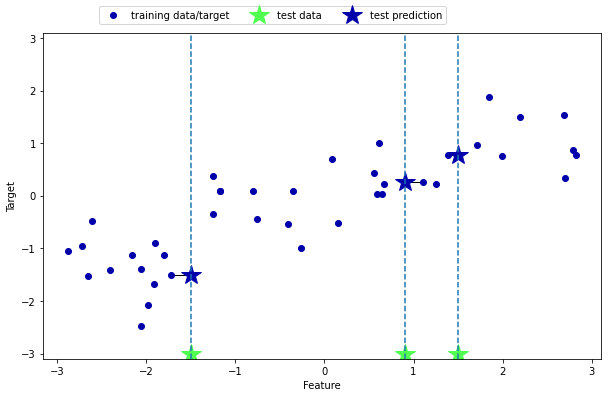

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

И снова для регрессии мы можем использовать большее количество
ближайших соседей. При использовании нескольких ближайших соседей
прогнозом становится среднее значение соответствующих соседей

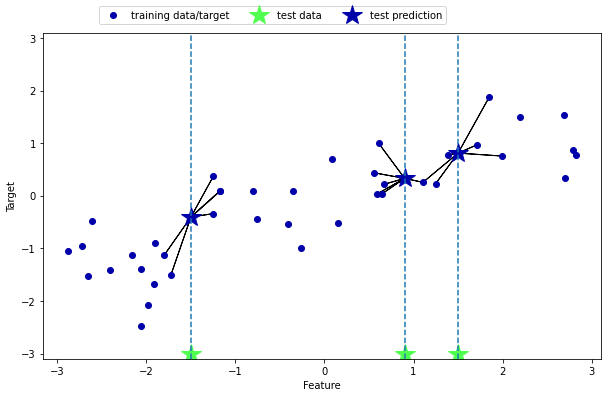

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=6)

Алгоритм регрессии k ближайших соседей реализован в классе
KNeighborsRegressor. Он используется точно так же, как
KNeighborsClassifier:

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

А теперь получим прогнозы для тестового набора.

In [24]:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


Кроме того, мы можем оценить качество модели с помощью метода
score, который для регрессионных моделей возвращает значение R2. R2,
также известный как коэффициент детерминации, является показателем качества регрессионной модели и принимает значения от 0 до 1.
Значение 1 соответствует идеальной прогнозирующей способности, а
значение 0 соответствует константе модели, которая лишь предсказывает
среднее значение ответов в обучающем наборе, y_train:

In [25]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


В данном случае значение R2 составляет 0.83, что указывает на
относительно хорошее качество подгонки модели.

   #### Анализ регрессии К ближайших соседей

Применительно к нашему одномерному массиву данных мы можем
увидеть прогнозы для всех возможных значений признаков (след. рис.).
Для этого мы создаем тестовый набор данных и визуализируем
полученные линии прогнозов:

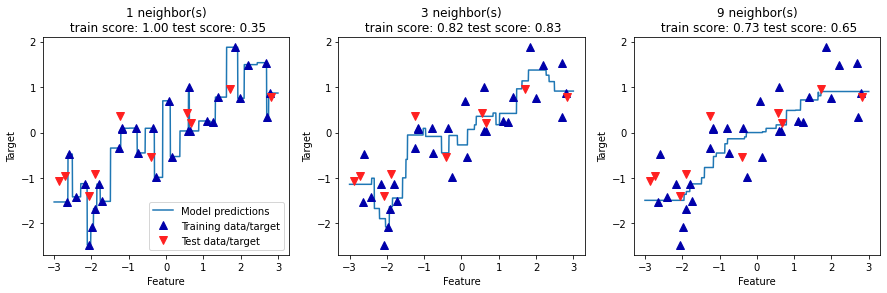

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

Как видно на графике, при использовании лишь одного соседа каждая
точка обучающего набора имеет очевидное влияние на прогнозы, и
предсказанные значения проходят через все точки данных. Это приводит
к очень неустойчивым прогнозам. Увеличение числа соседей приводит к
получению более сглаженных прогнозов, но при этом снижается
правильность подгонки к обучающим данным.

В принципе, в классификаторе KNeighbors есть два важных параметра:
количество соседей и мера расстояния между точками данных. На
практике использование небольшого числа соседей (например, 3-5) часто
работает хорошо, но вы, конечно, можете самостоятельно настроить этот
параметр. Вопрос, связанный с выбором правильной меры расстояния,
выходит за рамки этой книги. По умолчанию используется евклидово
расстояние, которое хорошо работает во многих ситуациях.
Одним из преимуществ метода ближайших соседей является то, что
эту модель очень легко интерпретировать и, как правило, этот метод дает
приемлемое качество без необходимости использования большого
количества настроек. Он является хорошим базовым алгоритмом,
который нужно попробовать в первую очередь, прежде чем
рассматривать более сложные методы. Как правило, построение модели
ближайших соседей происходит очень быстро, но, когда ваш обучающий
набор очень большой (с точки зрения количества характеристик или
количества наблюдений) получение прогнозов может занять некоторое
время. При использовании алгоритма ближайших соседей важно
выполнить предварительную обработку данных.
Данный метод не так хорошо работает, когда речь идет о наборах данных
с большим количеством признаков (сотни и более), и особенно плохо
работает в ситуации, когда подавляющее число признаков в большей
части наблюдений имеют нулевые значения (так называемые
разреженные наборы данных или sparse datasets).
Таким образом, несмотря на то что алгоритм ближайших соседей
легко интерпретировать, на практике он не часто используется из-за
скорости вычислений и его неспособности обрабатывать большое
количество признаков. Метод, который мы обсудим ниже, лишен этих
недостатков.